In [ ]:
%pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("wine-clustering.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
print("Shape:" , df.shape)
print("\nInfo:")
print(df.info())

In [ ]:
print("Missing Values:")
df.isnull().sum()

In [25]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


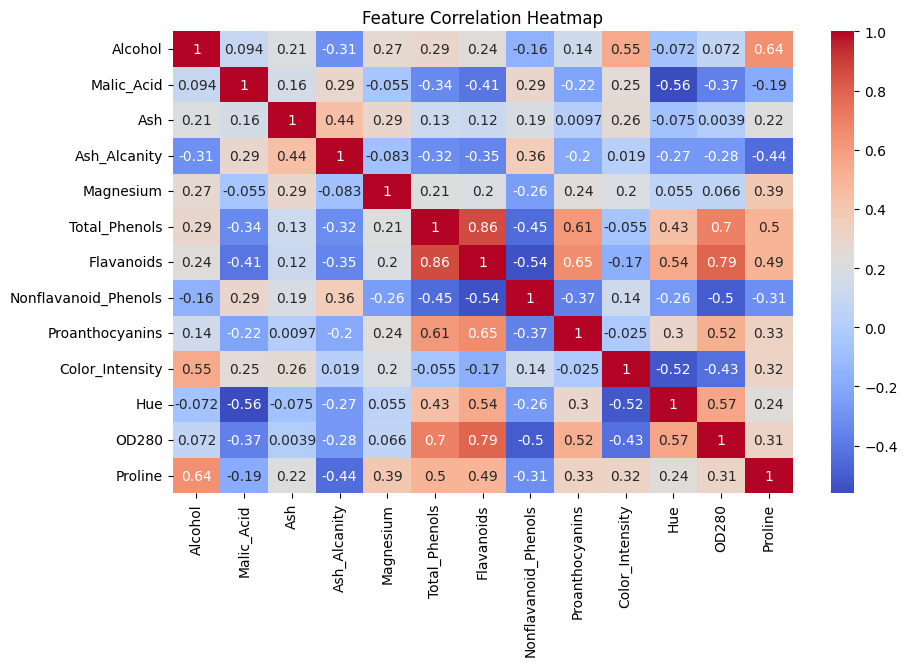

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #red -> higher corr , blue -> lower corr
plt.title("Feature Correlation Heatmap")
plt.show()

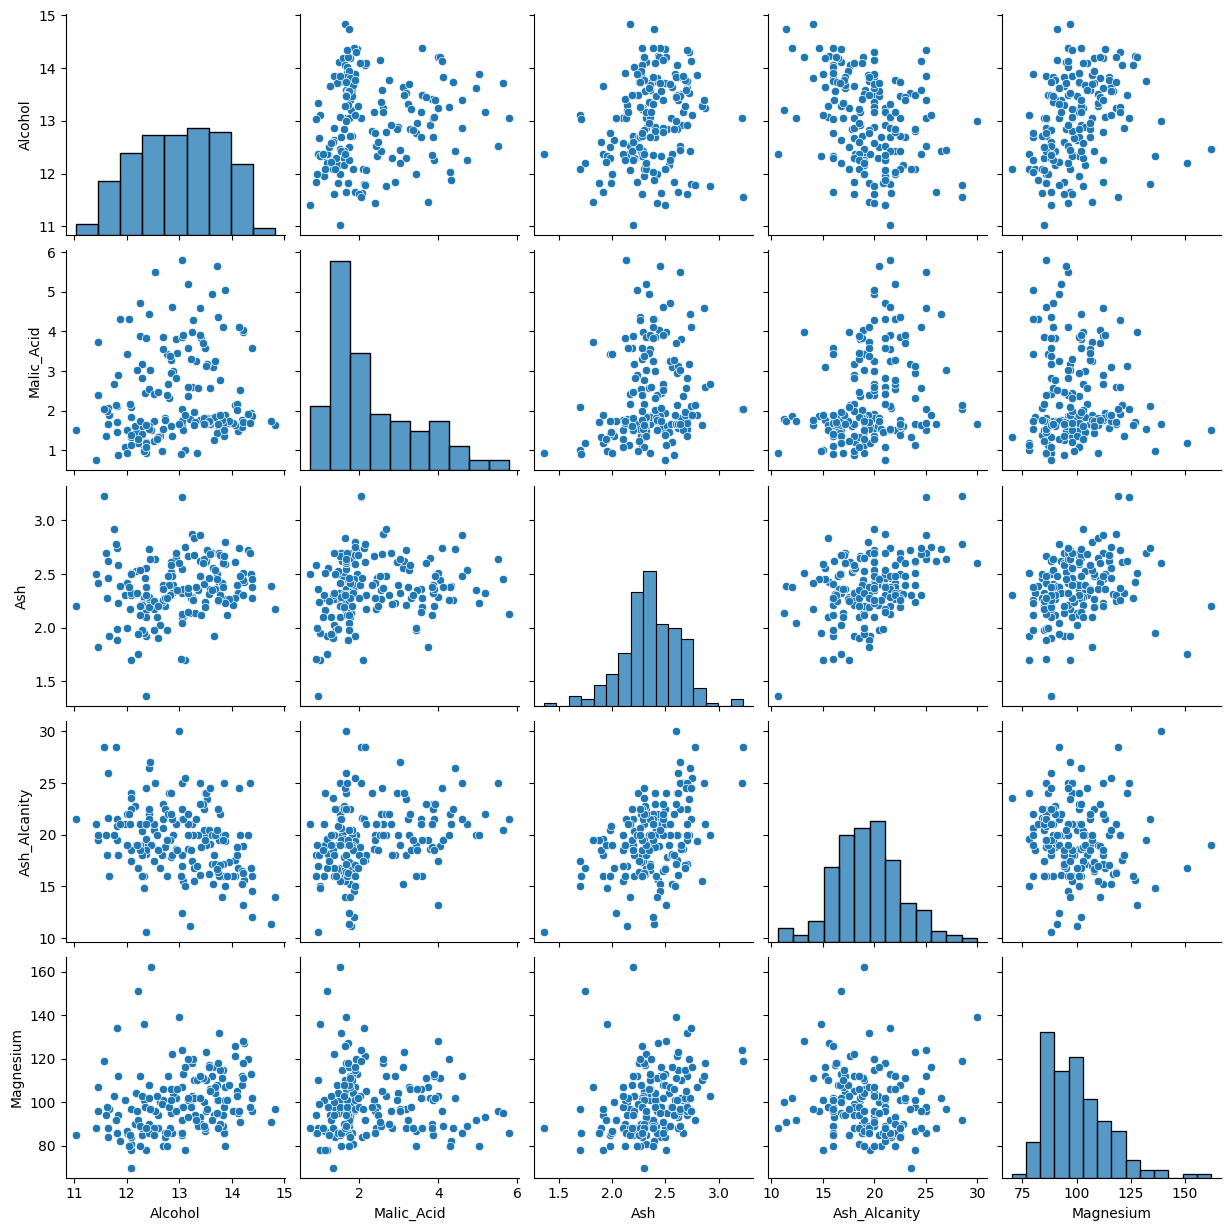

In [28]:
sns.pairplot(df.iloc[: , :5])
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [36]:
models = {}
scores = {}

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
scores['KMeans'] = silhouette_score(X, kmeans_labels)
models['KMeans'] = kmeans


agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
scores['Agglomerative'] = silhouette_score(X, agg_labels)
models['Agglomerative'] = agg

gmm = GaussianMixture(n_components=3 , random_state=42)
gmm_labels = gmm.fit_predict(X)
scores['GMM'] = silhouette_score(X, gmm_labels)
models['GMM'] = gmm

print("Silhouette Scores:", scores)

best_model = max(scores, key=scores.get)
print("\nBest Model:", best_model, "with score:", scores[best_model])

Silhouette Scores: {'KMeans': 0.2848589191898987, 'Agglomerative': 0.2774439826952265, 'GMM': 0.2848589191898987}

Best Model: KMeans with score: 0.2848589191898987


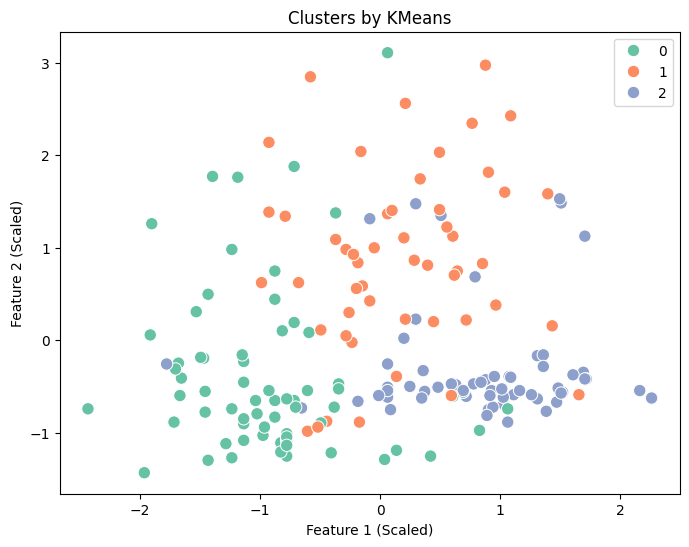

In [37]:
if best_model == 'KMeans':
    labels = kmeans_labels
elif best_model == 'Agglomerative':
    labels = agg_labels
else:
    labels = gmm_labels

# Add labels to dataframe
df['Cluster'] = labels

# Plot first 2 features for visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2', s=80)
plt.title(f"Clusters by {best_model}")
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()